In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)
df=pd.read_csv(r"C:\Users\ACER\Data Science_Python\Project\cleandata_imdb.csv")
df

,Movie_Name,year_of_release,rating,Run_time,Director,Language,Budget,first_day_collection,Worldwide_collection,Overseas_collection,India_gross_collection,Verdict
0,Marco,2024,7.5,2h 25m,Haneef Adeni,Malayalam,35.0,9.60,102.80,32.20,70.60,Blockbuster
1,Captain Miller,2024,6.5,2h 37m,Arun Matheswaran,Tamil,65.0,14.80,75.60,16.80,58.80,Average
2,Kanguva,2024,4.6,2h 32m,Siva,Tamil,200.0,40.20,105.20,23.80,81.40,Disaster
3,Article 370,2024,7.8,2h 38m,Aditya Suhas Jambhale,Hindi,40.0,8.20,104.80,12.60,92.20,Super Hit
4,Jatt & Juliet 3,2024,5.4,2h 15m,Jagdeep Sidhu,Punjabi,15.0,10.80,102.60,57.40,45.20,Blockbuster
5,Bade Miyan Chote Miyan,2024,3.8,2h 43m,Ali Abbas Zafar,Hindi,250.0,30.80,102.40,32.80,69.60,Disaster
6,Saripodhaa Sanivaaram,2024,7.0,2h 46m,Vivek Athreya,Telugu,55.0,21.80,101.40,25.60,75.80,Super Hit
7,Aranmanai 4,2024,5.0,2h 28m,Sundar C.,Tamil,35.0,5.60,98.60,20.20,78.40,Blockbuster
8,Guruvayoor Ambalanadayil,2024,6.6,2h 12m,Vipin Das,Malayalam,20.0,8.20,90.20,34.80,55.40,Blockbuster
9,Chandu Champion,2024,7.8,2h 22m,Kabir Khan,Hindi,95.0,7.60,89.20,13.80,75.40,Flop


In [4]:
df['year_of_release'].unique()

array([2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017], dtype=int64)

In [6]:
df['Language'].value_counts()

Language
Telugu       155
Hindi        143
Tamil        120
Malayalam     79
Kannada       32
Punjabi        3
Marathi        1
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Movie_Name              533 non-null    object 
 1   year_of_release         533 non-null    int64  
 2   rating                  533 non-null    float64
 3   Run_time                533 non-null    object 
 4   Director                533 non-null    object 
 5   Language                533 non-null    object 
 6   Budget                  533 non-null    float64
 7   first_day_collection    532 non-null    float64
 8   Worldwide_collection    532 non-null    float64
 9   Overseas_collection     526 non-null    float64
 10  India_gross_collection  533 non-null    float64
 11  Verdict                 533 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 50.1+ KB


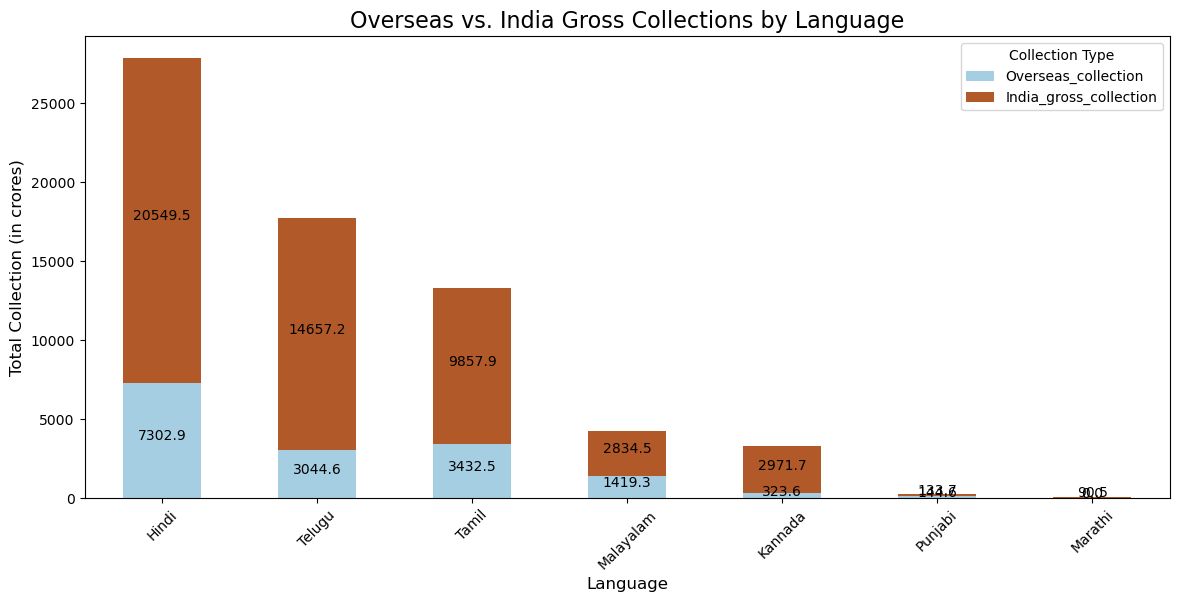

In [134]:
language_collections = df.groupby('Language')[['Overseas_collection', 'India_gross_collection']].sum()
language_collections['Total_Collection'] = language_collections.sum(axis=1)
language_collections = language_collections.sort_values(by='Total_Collection', ascending=False).drop(columns=['Total_Collection'])

ax = language_collections.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Paired')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='center', fontsize=10, color='black', padding=3)

plt.title('Overseas vs. India Gross Collections by Language', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Total Collection (in crores)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Collection Type")
plt.show()


#### --> from last 8 years(2017-2024) bollywood is dominating all other industries in overseas aa well as in india
--> Bollywood industry as contributed more followed by tollywood

In [14]:
df[['Verdict']].value_counts()

Verdict             
Blockbuster             154
Hit                      78
Disaster                 67
Super Hit                67
Flop                     53
Average                  50
Below Average            36
Above Average            17
All Time Blockbuster     11
Name: count, dtype: int64

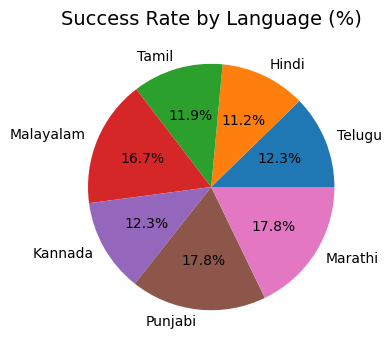

In [16]:
successful = df[df['Verdict'].isin(['Blockbuster', 'Super Hit', 'Hit','Disaster','All Time Blockbuster'])]
success_rate = successful['Language'].value_counts() / df['Language'].value_counts() * 100
plt.figure(figsize=(4,4))
plt.pie(success_rate.values, labels=success_rate.index, autopct='%1.1f%%')
plt.title('Success Rate by Language (%)', fontsize=14)
plt.show()

#### --> Punjab & Marathi industries as highest succes rate compared to other industry this two are very small industries
#### --> apart from this mollywood industriy as the highest succes rate followed by kollywood& tollywood
#### --> Hindi films dominate overseas collections but have a mixed success rate.

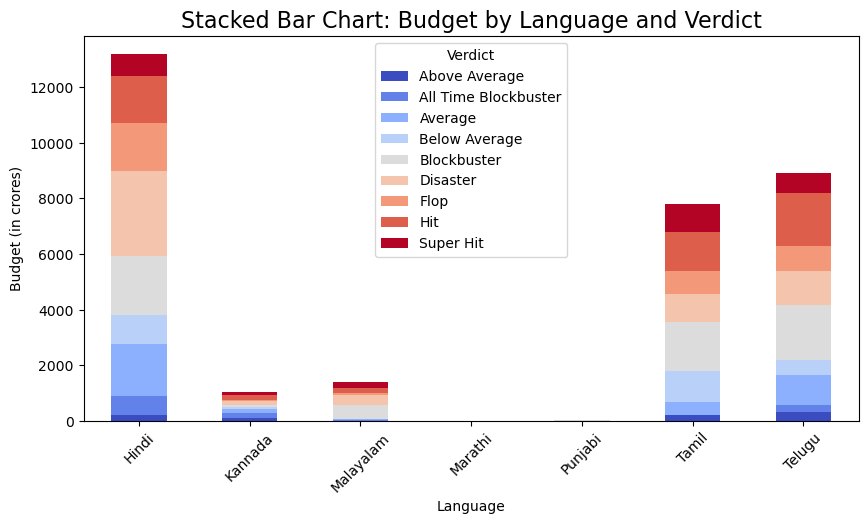

In [120]:
df_grouped = df.groupby(['Language', 'Verdict']).sum()['Budget'].unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title('Stacked Bar Chart: Budget by Language and Verdict', fontsize=16)
plt.xlabel('Language', fontsize=10)
plt.ylabel('Budget (in crores)', fontsize=10)
plt.xticks(rotation=45)
plt.show()

#### The stacked bar chart shows the budget distribution and box office verdict of Indian films across different languages, revealing Hindi cinema's dominance in budget despite varying success rates, while regional industries like Telugu and Tamil also demonstrate substantial spending and a range of outcomes, suggesting that high budgets don't guarantee box office success.

C:\Users\ACER\AppData\Local\Temp\ipykernel_2716\960394090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_roi.index, y=director_roi.values, palette='rocket')


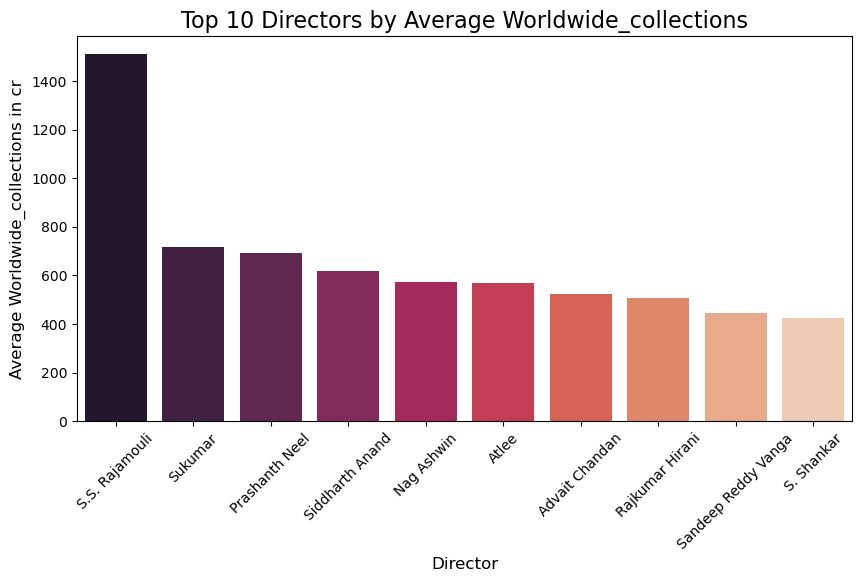

In [118]:
director_stats = df.groupby('Director').filter(lambda x: len(x) >= 2)
director_roi = director_stats.groupby('Director')['Worldwide_collection'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=director_roi.index, y=director_roi.values, palette='rocket')
plt.title('Top 10 Directors by Average Worldwide_collections', fontsize=16)
plt.xlabel('Director', fontsize=12)
plt.ylabel('Average Worldwide_collections in cr', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [29]:
director_roi

Director
S.S. Rajamouli         1509.000000
Sukumar                 718.266667
Prashanth Neel          692.866667
Siddharth Anand         618.740000
Nag Ashwin              571.950000
Atlee                   567.183333
Advait Chandan          523.050000
Rajkumar Hirani         507.150000
Sandeep Reddy Vanga     445.800000
S. Shankar              424.900000
Name: Worldwide_collection, dtype: float64

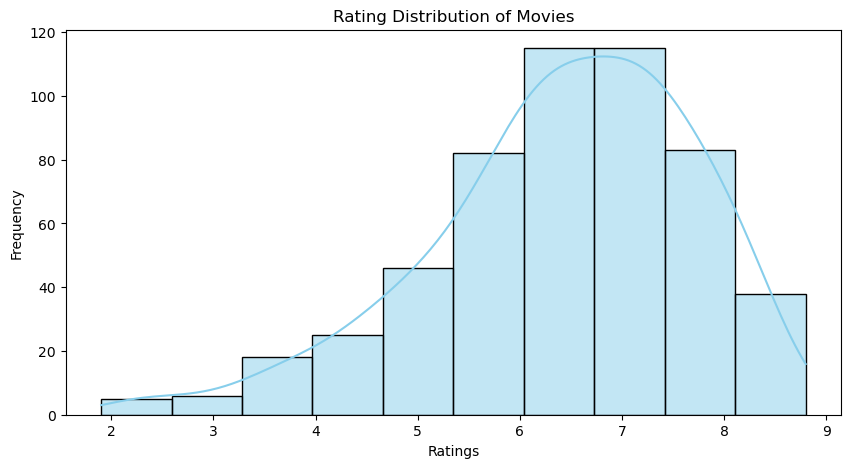

In [116]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Rating Distribution of Movies')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

In [34]:
df.groupby('Language')['rating'].mean()

Language
Hindi        6.109790
Kannada      6.500000
Malayalam    6.912658
Marathi      8.000000
Punjabi      6.233333
Tamil        6.525833
Telugu       6.306452
Name: rating, dtype: float64

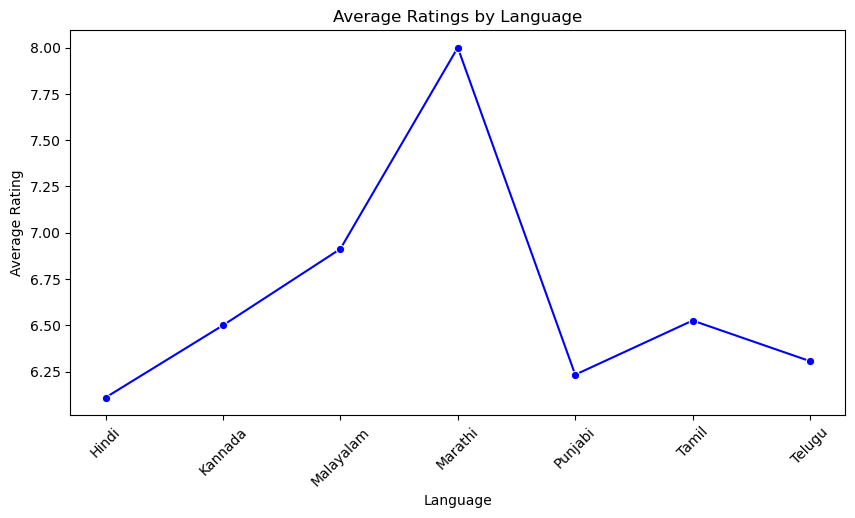

In [138]:
avg_ratings = df.groupby('Language')['rating'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='Language', y='rating', data=avg_ratings, marker='o', color='b')
plt.title('Average Ratings by Language')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  
plt.show()

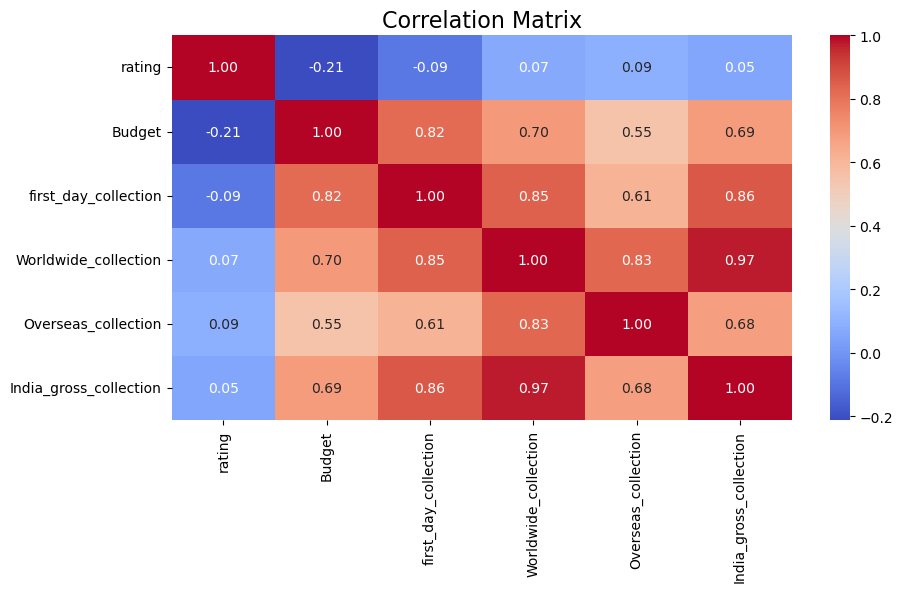

In [112]:
numerical_cols = ['rating', 'Budget', 'first_day_collection', 'Worldwide_collection', 
                  'Overseas_collection', 'India_gross_collection']

plt.figure(figsize=(10, 5))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

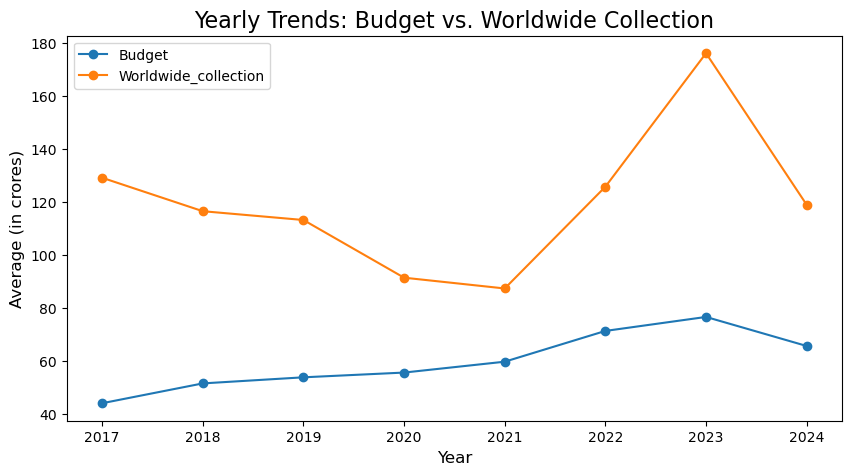

In [110]:
yearly_stats = df.groupby('year_of_release').agg({'Budget': 'mean', 'Worldwide_collection': 'mean'})

# Plot
yearly_stats.plot(kind='line', marker='o', figsize=(10, 5))
plt.title('Yearly Trends: Budget vs. Worldwide Collection', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average (in crores)', fontsize=12)
plt.show()

In [130]:
df[df['year_of_release']==2023]

,Movie_Name,year_of_release,rating,Run_time,Director,Language,Budget,first_day_collection,Worldwide_collection,Overseas_collection,India_gross_collection,Verdict
103,Pathaan,2023,5.8,2h 26m,Siddharth Anand,Hindi,250.0,103.60,1042.20,393.4,648.80,All Time Blockbuster
104,Jawan,2023,6.9,2h 49m,Atlee,Hindi,300.0,126.40,1150.70,386.4,764.30,All Time Blockbuster
105,Dada,2023,8.1,2h 13m,Ganesh K. Babu,Tamil,10.0,2.30,20.90,1.5,19.40,Blockbuster
106,Bhagavanth Kesari,2023,5.8,2h 44m,Anil Ravipudi,Telugu,85.0,25.60,114.50,16.2,98.30,Hit
107,Mangalavaram,2023,6.8,2h 29m,Ajay Bhupathi,Telugu,15.0,4.20,21.80,2.3,19.50,Hit
108,Fukrey 3,2023,5.5,2h 27m,Mrighdeep Lamba,Hindi,45.0,12.40,128.40,13.5,114.90,Super Hit
109,Sam Bahadur,2023,7.7,2h 30m,Meghna Gulzar,Hindi,55.0,8.40,127.30,17.6,109.70,Super Hit
110,Dasara,2023,6.6,2h 36m,Srikanth Odela,Telugu,55.0,38.70,120.40,21.8,98.60,Super Hit
111,Satyaprem Ki Katha,2023,6.7,2h 26m,Sameer Vidwans,Hindi,75.0,9.30,117.20,25.4,91.80,Average
112,Vaathi,2023,7.3,2h 19m,Venky Atluri,Tamil,40.0,14.80,116.20,24.8,91.40,Blockbuster


In [64]:
df.groupby('Language')['Worldwide_collection'].max()

Language
Hindi        1150.7
Kannada      1215.0
Malayalam     241.6
Marathi        90.5
Punjabi       102.6
Tamil         701.0
Telugu       1788.0
Name: Worldwide_collection, dtype: float64

C:\Users\ACER\AppData\Local\Temp\ipykernel_2716\2880528521.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_collection_by_language.index, y=max_collection_by_language.values, palette='viridis')


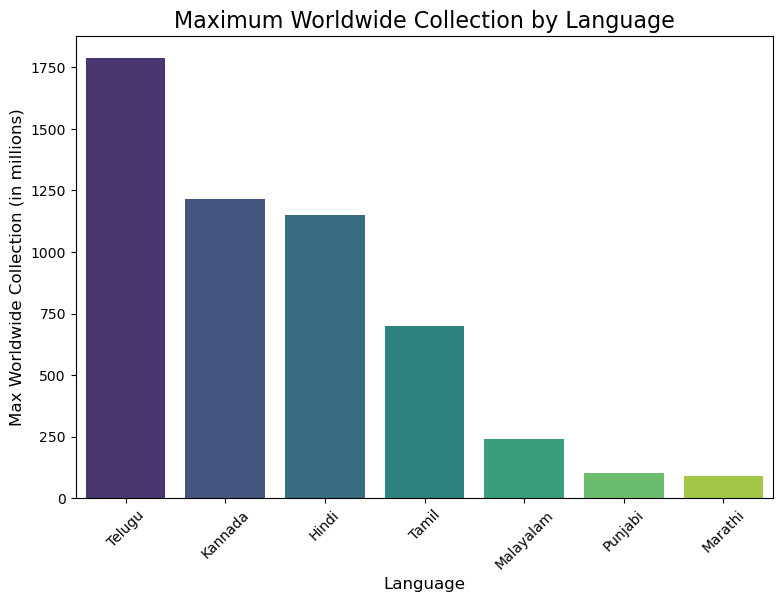

In [132]:
max_collection_by_language = df.groupby('Language')['Worldwide_collection'].max()
max_collection_by_language = max_collection_by_language.sort_values(ascending=False)

plt.figure(figsize=(9, 6))
sns.barplot(x=max_collection_by_language.index, y=max_collection_by_language.values, palette='viridis')

plt.title('Maximum Worldwide Collection by Language', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Max Worldwide Collection (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

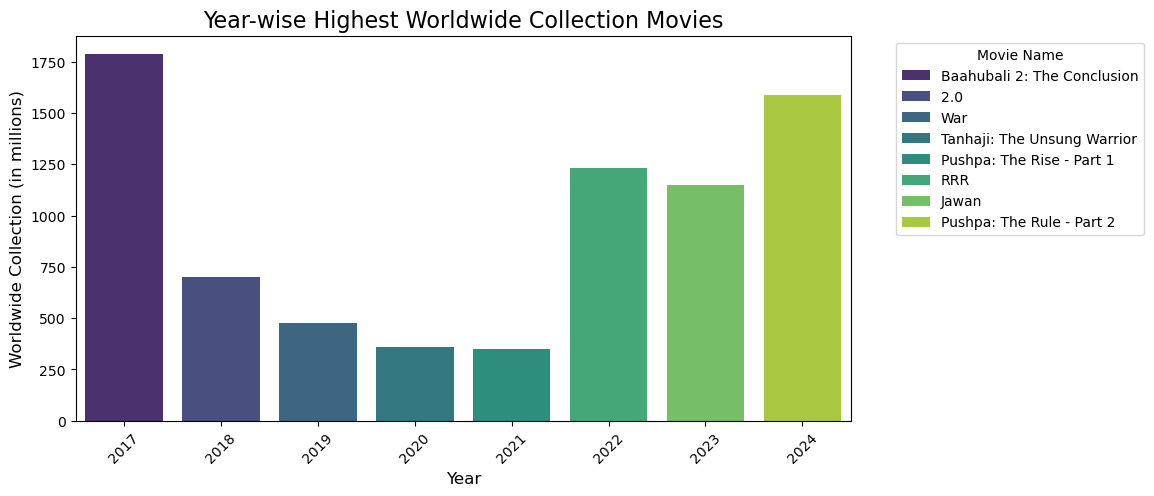

In [108]:
highest_collection_per_year = df.loc[df.groupby('year_of_release')['Worldwide_collection'].idxmax()]
plt.figure(figsize=(10, 5))
sns.barplot(x=highest_collection_per_year['year_of_release'], 
            y=highest_collection_per_year['Worldwide_collection'], 
            hue=highest_collection_per_year['Movie_Name'], 
            palette='viridis')
plt.title('Year-wise Highest Worldwide Collection Movies', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Worldwide Collection (in millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Movie Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Malayalam films have the highest ROI despite lower budgets.

#### Hindi films dominate overseas collections but have a mixed success rate.

#### Tamil films show high volatility: some are Blockbusters, others are Disasters.

#### First-day collections strongly correlate with verdicts (Blockbusters start strong).